# Modelling

### In this notebook we import our final training and testset to train our classical ranking models (naive bayes, logistic regression, MLPClassifier) and get an evaluation how good the ranking is via Mean Average Precision

In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

# I. Import data

In [ ]:
df_train=pd.read_json("../data/processed/feature_dataframe.json")
#df_test=pd.read_json("../data/processed/feature_retrieval_reduced.json")

In [ ]:
df_train

In [10]:
df_test

,source_id,target_id,number_punctuations_total_difference,number_punctuations_total_difference_relative,number_punctuations_total_difference_normalized,number_words_difference,number_words_difference_relative,number_!_difference,number_!_difference_relative,number_!_difference_normalized,...,pca_embeddding_average_diff_2,pca_embeddding_tf_idf_diff_2,pca_embeddding_average_diff_3,pca_embeddding_average_diff_4,pca_embeddding_average_diff_5,pca_embeddding_average_diff_6,pca_embeddding_average_diff_7,pca_embeddding_average_diff_8,pca_embeddding_average_diff_9,Translation
0,20000,20000,1,0.333333,-0.053913,-3,-0.136364,0,0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,20000,20001,1,0.333333,-0.130000,-10,-0.454545,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,20000,20002,-3,-1.000000,0.120000,-19,-0.863636,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,20000,20003,-3,-1.000000,0.120000,-18,-0.818182,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,20000,20004,-2,-0.666667,-0.005000,-15,-0.681818,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,20099,24995,4,0.000000,-0.137931,19,3.166667,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
499996,20099,24996,3,0.000000,-0.176471,8,1.333333,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
499997,20099,24997,2,0.000000,-0.125000,8,1.333333,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
499998,20099,24998,3,0.000000,-0.093750,23,3.833333,0,0,0.0,...,0,0,0,0,0,0,0,0,0,0


# II. Feature selection

### Have a look at correlations to shrink the feature subset

<ipython-input-11-54347e945af3>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()


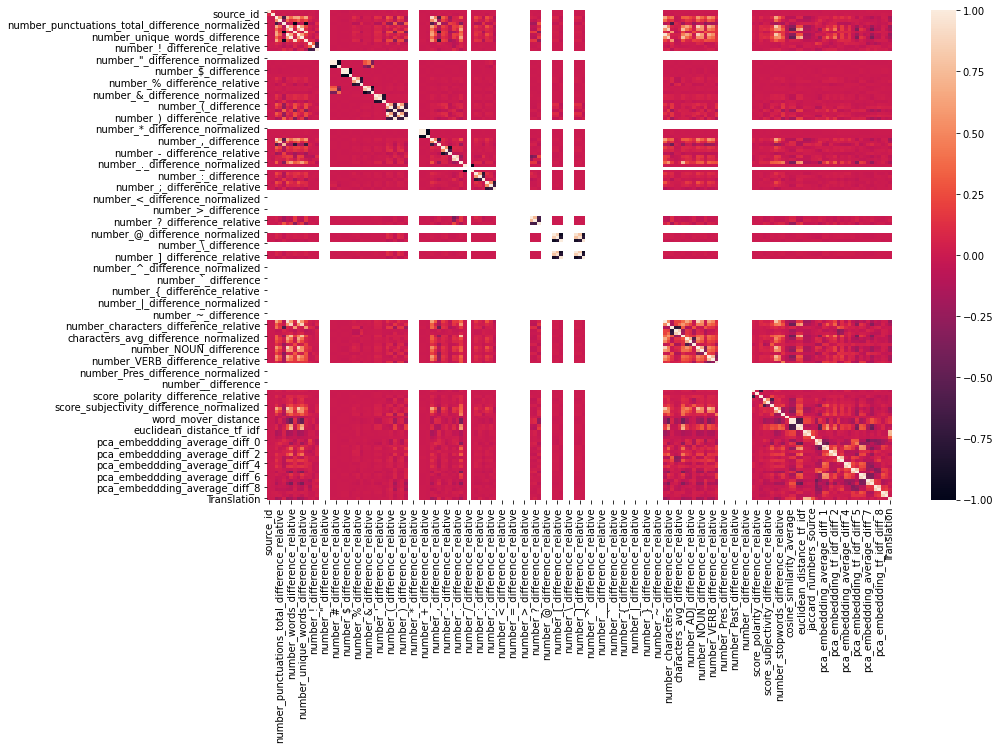

In [11]:
# investigate correlation heatmap
corrMatrix=df_train.corr()
f=plt.figure(figsize=(14,9))
sn.heatmap(corrMatrix, annot=False)
f.show()

In [12]:
# print all correlated features and drop them from the dataset
correlated_features = set()
correlation_matrix = df_train.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            print(f"The following features are correlated: {correlation_matrix.columns[i]} and {correlation_matrix.columns[j]}. Correlation = {round(abs(correlation_matrix.iloc[i, j]),2)}")
            colname = correlation_matrix.columns[j] # changed from i to j here for dropping
            correlated_features.add(colname)

print(f"Drop the following features: {correlated_features}")
df_train=df_train.drop(columns=correlated_features)
df_train

The following features are correlated: number_words_difference_normalized and number_punctuations_total_difference_normalized. Correlation = 1.0
The following features are correlated: number_unique_words_difference and number_words_difference. Correlation = 0.99
The following features are correlated: number_unique_words_difference_relative and number_words_difference_relative. Correlation = 1.0
The following features are correlated: number_unique_words_difference_normalized and number_punctuations_total_difference_normalized. Correlation = 0.92
The following features are correlated: number_unique_words_difference_normalized and number_words_difference_normalized. Correlation = 0.92
The following features are correlated: number_#_difference_relative and number_#_difference. Correlation = 1.0
The following features are correlated: number_#_difference_normalized and number_#_difference. Correlation = 1.0
The following features are correlated: number_#_difference_normalized and number_#_di

,source_id,target_id,number_unique_words_difference_normalized,number_!_difference,number_!_difference_relative,number_!_difference_normalized,"number_""_difference","number_""_difference_relative","number_""_difference_normalized",number_#_difference_normalized,...,pca_embeddding_average_diff_2,pca_embeddding_tf_idf_diff_2,pca_embeddding_tf_idf_diff_3,pca_embeddding_tf_idf_diff_4,pca_embeddding_tf_idf_diff_5,pca_embeddding_tf_idf_diff_6,pca_embeddding_tf_idf_diff_7,pca_embeddding_tf_idf_diff_8,pca_embeddding_tf_idf_diff_9,Translation
0,0,0,0.137480,0,0,0.0,0,0,0,0.0,...,0.016341,0.003404,0.014179,0.004087,-0.008693,-0.002087,0.001772,0.004103,-0.011380,1
1,1,1,0.000000,0,0,0.0,0,0,0,0.0,...,-0.032582,-0.007806,-0.003565,-0.015104,-0.003723,-0.009905,-0.017851,-0.000663,-0.015789,1
2,2,2,0.250000,0,0,0.0,0,0,0,0.0,...,-0.022822,-0.008628,0.020013,-0.035813,0.051464,-0.036132,-0.030033,-0.001648,-0.000623,1
3,3,3,-0.028070,0,0,0.0,0,0,0,0.0,...,0.005790,0.002972,0.008704,-0.020203,-0.028189,-0.025530,0.003518,0.007949,-0.020123,1
4,4,4,-0.046218,0,0,0.0,0,0,0,0.0,...,-0.012726,-0.001670,0.018786,-0.007390,-0.018249,-0.028945,0.036022,0.017436,-0.022765,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219995,19999,13747,0.159091,0,0,0.0,0,0,0,0.0,...,-0.046761,-0.003717,0.032380,0.000465,-0.024454,0.006951,-0.013581,0.006560,-0.020721,0
219996,19999,18387,0.090909,0,0,0.0,0,0,0,0.0,...,-0.002358,-0.000053,0.014238,-0.014649,-0.059574,0.015654,-0.005740,0.021571,-0.027039,0
219997,19999,4964,-0.019481,0,0,0.0,0,0,0,0.0,...,0.016905,0.014412,0.012973,-0.001786,-0.037964,0.021780,-0.005652,0.016596,-0.018164,0
219998,19999,12897,0.034091,0,0,0.0,0,0,0,0.0,...,0.026805,0.012577,0.021748,-0.008936,-0.031841,0.013315,0.002369,0.022763,-0.020741,0


In [59]:
# import pickle 
# filehandler = open('../data/processed/correlated_features.pkl', 'wb') 
# pickle.dump(correlated_features, filehandler)

In [60]:
# import pickle 
# file = open("../data/processed/correlated_features.pkl",'rb')
# df = pickle.load(file)
# file.close()

# III. First baseline models

### Train-Test-split to have a look at accuracy and f1_score to evaluate the normal classification

In [13]:
# drop source and target id
df_train=df_train.drop(columns=['source_id','target_id'])

In [14]:
# #scale data into [0,1]
# scaler = preprocessing.MinMaxScaler()
# df_train[df_train.columns] = scaler.fit_transform(df_train[df_train.columns])


In [15]:
target_train=df_train['Translation']
data_train=df_train.drop(columns=['Translation'])

In [16]:
data_train, data_test, target_train, target_test = train_test_split(data_train, target_train, test_size=0.2, random_state=42, stratify=target_train)

In [17]:
data_train

,number_unique_words_difference_normalized,number_!_difference,number_!_difference_relative,number_!_difference_normalized,"number_""_difference","number_""_difference_relative","number_""_difference_normalized",number_#_difference_normalized,number_$_difference_normalized,number_%_difference_relative,...,pca_embeddding_tf_idf_diff_1,pca_embeddding_average_diff_2,pca_embeddding_tf_idf_diff_2,pca_embeddding_tf_idf_diff_3,pca_embeddding_tf_idf_diff_4,pca_embeddding_tf_idf_diff_5,pca_embeddding_tf_idf_diff_6,pca_embeddding_tf_idf_diff_7,pca_embeddding_tf_idf_diff_8,pca_embeddding_tf_idf_diff_9
158621,0.222222,0,0,0.000000,0,0,0,0.0,0.0,0.0,...,0.088619,-0.032401,-0.007660,0.004813,0.003811,-0.008650,-0.017665,-0.016128,0.007046,0.010127
8414,0.181818,0,0,0.000000,0,0,0,0.0,0.0,0.0,...,0.025176,0.051271,0.019101,0.020740,-0.014138,-0.021526,-0.011370,-0.015745,0.009938,0.005780
205214,-0.023873,1,0,-0.034483,0,0,0,0.0,0.0,0.0,...,0.036528,-0.030891,0.000488,0.015917,-0.012478,-0.013599,-0.028531,-0.011444,0.011241,-0.008836
60580,0.263158,0,0,0.000000,0,0,0,0.0,0.0,0.0,...,0.022329,-0.019986,-0.002522,0.005037,0.005109,-0.020171,-0.021520,-0.004458,0.008518,-0.004897
215717,0.216667,0,0,0.000000,0,0,0,0.0,0.0,0.0,...,0.010210,0.017400,0.007362,0.030929,-0.003307,-0.019586,-0.007979,-0.001874,0.013944,-0.006988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118539,0.121212,1,0,-0.041667,0,0,0,0.0,0.0,0.0,...,0.020337,-0.081423,-0.016646,0.019563,0.009967,-0.016327,-0.016344,-0.001205,0.013116,-0.008325
153427,0.099744,0,0,0.000000,0,0,0,0.0,0.0,0.0,...,0.004814,-0.017246,-0.000965,0.014695,-0.007653,-0.018686,-0.026781,-0.009700,0.019716,-0.015006
185254,-0.052381,0,0,0.000000,0,0,0,0.0,0.0,0.0,...,0.004042,-0.032330,-0.000169,0.033761,-0.026062,-0.021986,-0.010211,-0.021509,0.002453,-0.014438
106550,-0.072682,0,0,0.000000,0,0,0,0.0,0.0,0.0,...,0.015395,0.008839,-0.001267,0.020828,-0.014224,-0.022028,-0.023305,-0.005682,0.009376,-0.013748


## Naive Bayes

In [18]:
nb = GaussianNB().fit(data_train, target_train)
prediction = nb.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction)
ll=log_loss(target_test,prediction)
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))
print("The Los_loss on test set: {:.4f}".format(ll))

The Accuracy on test set: 0.9087
The F1-Score on test set: 0.0000
The Precision-Score on test set: 0.0000
The Recall-Score on test set: 0.0000
The Los_loss on test set: 3.1548


c:\users\nikla\pycharmprojects\crosslingual-information-retrieval\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Multi-Layer-Perceptron

In [19]:
mlp = MLPClassifier().fit(data_train, target_train)
prediction = mlp.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
ll=log_loss(target_test,prediction)
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))
print("The Los_loss on test set: {:.4f}".format(ll))

The Accuracy on test set: 0.9779
The F1-Score on test set: 0.8679
The Precision-Score on test set: 0.9549
The Recall-Score on test set: 0.7955
The Los_loss on test set: 0.7638


## Logistic Regression

In [20]:
lr = LogisticRegression(max_iter=10000).fit(data_train, target_train)
prediction = lr.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
ll=log_loss(target_test,prediction)
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))
print("The Los_loss on test set: {:.4f}".format(ll))

The Accuracy on test set: 0.6583
The F1-Score on test set: 0.1915
The Precision-Score on test set: 0.1221
The Recall-Score on test set: 0.4429
The Los_loss on test set: 11.8007


In [14]:
rfe = RFECV(estimator=LogisticRegression(max_iter=10000),cv=5,scoring='neg_log_loss', min_features_to_select=60, step=5,verbose=2)
rfe.fit(data_train, target_train)
prediction = rfe.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
ll=log_loss(target_test,prediction)
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))
print("The Los_loss on test set: {:.4f}".format(ll))

Fitting estimator with 123 features.
Fitting estimator with 118 features.
Fitting estimator with 113 features.
Fitting estimator with 108 features.
Fitting estimator with 103 features.
Fitting estimator with 98 features.
Fitting estimator with 93 features.
Fitting estimator with 88 features.
Fitting estimator with 83 features.
Fitting estimator with 78 features.
Fitting estimator with 73 features.
Fitting estimator with 68 features.
Fitting estimator with 63 features.
Fitting estimator with 123 features.
Fitting estimator with 118 features.
Fitting estimator with 113 features.
Fitting estimator with 108 features.
Fitting estimator with 103 features.
Fitting estimator with 98 features.
Fitting estimator with 93 features.
Fitting estimator with 88 features.
Fitting estimator with 83 features.
Fitting estimator with 78 features.
Fitting estimator with 73 features.
Fitting estimator with 68 features.
Fitting estimator with 63 features.
Fitting estimator with 123 features.
Fitting estimator

In [15]:
# summarize all features
dropped_features = set()

for i in range(len(data_train.columns)):
    print('Column: %s, Selected %s, Rank: %.3f' % (data_train.columns[i], rfe.support_[i], rfe.ranking_[i]))
    if rfe.ranking_[i]>1.000:
        colname = data_train.columns[i]
        dropped_features.add(colname)

print(f"Drop the following features: {dropped_features}")
df_train=df_train.drop(columns=dropped_features)
df_train


Column: number_punctuations_total_difference, Selected True, Rank: 1.000
Column: number_punctuations_total_difference_relative, Selected True, Rank: 1.000
Column: number_punctuations_total_difference_normalized, Selected True, Rank: 1.000
Column: number_words_difference, Selected True, Rank: 1.000
Column: number_words_difference_relative, Selected True, Rank: 1.000
Column: number_!_difference, Selected True, Rank: 1.000
Column: number_!_difference_relative, Selected True, Rank: 1.000
Column: number_!_difference_normalized, Selected True, Rank: 1.000
Column: number_"_difference, Selected True, Rank: 1.000
Column: number_"_difference_relative, Selected True, Rank: 1.000
Column: number_"_difference_normalized, Selected True, Rank: 1.000
Column: number_#_difference, Selected True, Rank: 1.000
Column: number_$_difference, Selected True, Rank: 1.000
Column: number_%_difference, Selected True, Rank: 1.000
Column: number_%_difference_relative, Selected True, Rank: 1.000
Column: number_&_differ

,number_punctuations_total_difference,number_punctuations_total_difference_relative,number_punctuations_total_difference_normalized,number_words_difference,number_words_difference_relative,number_!_difference,number_!_difference_relative,number_!_difference_normalized,"number_""_difference","number_""_difference_relative",...,pca_embeddding_average_diff_2,pca_embeddding_tf_idf_diff_2,pca_embeddding_average_diff_3,pca_embeddding_average_diff_4,pca_embeddding_average_diff_5,pca_embeddding_average_diff_6,pca_embeddding_average_diff_7,pca_embeddding_average_diff_8,pca_embeddding_average_diff_9,Translation
0,0.661017,0.116667,0.289525,0.488506,0.015504,0.333333,0.5,0.333333,0.0,0.0,...,0.574370,0.518234,0.537569,0.534955,0.543298,0.443394,0.419036,0.567010,0.475334,1.0
1,0.491525,0.033333,0.400000,0.517241,0.017544,0.333333,0.5,0.333333,0.0,0.0,...,0.500732,0.502476,0.413645,0.388961,0.557938,0.386897,0.290233,0.539811,0.431191,1.0
2,0.542373,0.033333,0.250000,0.528736,0.022556,0.333333,0.5,0.333333,0.0,0.0,...,0.515422,0.501320,0.476876,0.300935,0.761166,0.339494,0.293659,0.525116,0.574548,1.0
3,0.491525,0.033333,0.416842,0.540230,0.022942,0.333333,0.5,0.333333,0.0,0.0,...,0.558488,0.517626,0.463485,0.386767,0.474701,0.323096,0.437154,0.586224,0.424620,1.0
4,0.491525,0.033333,0.392437,0.500000,0.014254,0.333333,0.5,0.333333,0.0,0.0,...,0.530619,0.511101,0.507666,0.470015,0.532894,0.322316,0.605757,0.625201,0.427493,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219995,0.542373,0.133333,0.334545,0.551724,0.028070,0.333333,0.5,0.333333,0.0,0.0,...,0.479390,0.508223,0.551199,0.495638,0.518470,0.462412,0.339695,0.577387,0.459207,0.0
219996,0.508475,0.066667,0.345455,0.511494,0.015789,0.333333,0.5,0.333333,0.0,0.0,...,0.546224,0.513374,0.459046,0.419694,0.397374,0.505843,0.391062,0.618739,0.458924,0.0
219997,0.491525,0.033333,0.411688,0.534483,0.022807,0.333333,0.5,0.333333,0.0,0.0,...,0.575219,0.533707,0.461098,0.485584,0.467400,0.529203,0.400001,0.643697,0.489480,0.0
219998,0.508475,0.066667,0.379545,0.540230,0.024561,0.333333,0.5,0.333333,0.0,0.0,...,0.590120,0.531129,0.496286,0.427378,0.478172,0.490476,0.446789,0.675508,0.464431,0.0


In [ ]:
# Drop the following features: {'number_{_difference', 'number_Past_difference', 'number_@_difference_normalized', 'number_<_difference', 'number_<_difference_normalized', 'number_<_difference_relative', 'number___difference_relative', 'number_`_difference', 'number_Pres_difference_normalized', 'number_/_difference_relative', 'number_\\_difference_normalized', 'number_\\_difference_relative', 'number_\\_difference', 'number_{_difference_relative', 'number_=_difference'}

## Dropped features with logistic regression -> 107 Features

In [16]:
target_train=df_train['Translation']
data_train=df_train.drop(columns=['Translation'])

In [17]:
data_train, data_test, target_train, target_test = train_test_split(data_train, target_train, test_size=0.2, random_state=42, stratify=target_train)

## Naive Bayes

In [18]:
nb = GaussianNB().fit(data_train, target_train)
prediction = nb.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
ll=log_loss(target_test,prediction)
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))
print("The Los_loss on test set: {:.4f}".format(ll))

The Accuracy on test set: 0.7467
The F1-Score on test set: 0.4081
The Precision-Score on test set: 0.2594
The Recall-Score on test set: 0.9560
The Los_loss on test set: 8.7487


## Multi-Layer-Perceptron

In [19]:
mlp = MLPClassifier().fit(data_train, target_train)
prediction = mlp.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
ll=log_loss(target_test,prediction)
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))
print("The Los_loss on test set: {:.4f}".format(ll))

The Accuracy on test set: 0.9873
The F1-Score on test set: 0.9283
The Precision-Score on test set: 0.9618
The Recall-Score on test set: 0.8970
The Los_loss on test set: 0.4372


## Logistic Regression

In [20]:
lr = LogisticRegression(max_iter=10000).fit(data_train, target_train)
prediction = lr.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
ll=log_loss(target_test,prediction)
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))
print("The Los_loss on test set: {:.4f}".format(ll))

The Accuracy on test set: 0.9800
The F1-Score on test set: 0.8826
The Precision-Score on test set: 0.9488
The Recall-Score on test set: 0.8251
The Los_loss on test set: 0.6923


Feature: 0 number_punctuations_total_difference, Score: -0.835727593096431
Feature: 1 number_punctuations_total_difference_relative, Score: -1.821683235415519
Feature: 2 number_punctuations_total_difference_normalized, Score: -1.7813743962724833
Feature: 3 number_words_difference, Score: -1.9154976820289573
Feature: 4 number_words_difference_relative, Score: -10.530337854688447
Feature: 5 number_!_difference, Score: -0.5296516520385978
Feature: 6 number_!_difference_relative, Score: 2.4647051207282162
Feature: 7 number_!_difference_normalized, Score: -0.7605315148679513
Feature: 8 number_"_difference, Score: 0.0
Feature: 9 number_"_difference_relative, Score: 0.0
Feature: 10 number_"_difference_normalized, Score: 0.0
Feature: 11 number_#_difference, Score: 0.006789717520046923
Feature: 12 number_$_difference, Score: 0.020486882548225116
Feature: 13 number_%_difference, Score: 0.0626115790566628
Feature: 14 number_%_difference_relative, Score: 4.013899736502174
Feature: 15 number_&_diff

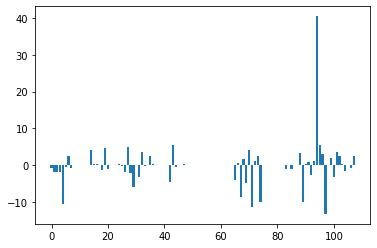

In [21]:
# feature importance
# get importance
importance = lr.coef_[0]
# summarize feature importance
for i, v in enumerate(importance):
    print(f'Feature: {i} {data_train.columns[i]}, Score: {v}')

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [22]:
rfe = RFECV(estimator=LogisticRegression(max_iter=10000),cv=5,scoring='neg_log_loss', min_features_to_select=60, step=5,verbose=2)
rfe.fit(data_train, target_train)
prediction = rfe.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
ll=log_loss(target_test,prediction)
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))
print("The Los_loss on test set: {:.4f}".format(ll))

Fitting estimator with 108 features.
Fitting estimator with 103 features.
Fitting estimator with 98 features.
Fitting estimator with 93 features.
Fitting estimator with 88 features.
Fitting estimator with 83 features.
Fitting estimator with 78 features.
Fitting estimator with 73 features.
Fitting estimator with 68 features.
Fitting estimator with 63 features.
Fitting estimator with 108 features.
Fitting estimator with 103 features.
Fitting estimator with 98 features.
Fitting estimator with 93 features.
Fitting estimator with 88 features.
Fitting estimator with 83 features.
Fitting estimator with 78 features.
Fitting estimator with 73 features.
Fitting estimator with 68 features.
Fitting estimator with 63 features.
Fitting estimator with 108 features.
Fitting estimator with 103 features.
Fitting estimator with 98 features.
Fitting estimator with 93 features.
Fitting estimator with 88 features.
Fitting estimator with 83 features.
Fitting estimator with 78 features.
Fitting estimator with

In [23]:
# summarize all features
dropped_features = set()

for i in range(len(data_train.columns)):
    print('Column: %s, Selected %s, Rank: %.3f' % (data_train.columns[i], rfe.support_[i], rfe.ranking_[i]))
    if rfe.ranking_[i]>1.000:
        colname = data_train.columns[i]
        dropped_features.add(colname)

print(f"Drop the following features: {dropped_features}")
df_train=df_train.drop(columns=dropped_features)
df_train

Column: number_punctuations_total_difference, Selected True, Rank: 1.000
Column: number_punctuations_total_difference_relative, Selected True, Rank: 1.000
Column: number_punctuations_total_difference_normalized, Selected True, Rank: 1.000
Column: number_words_difference, Selected True, Rank: 1.000
Column: number_words_difference_relative, Selected True, Rank: 1.000
Column: number_!_difference, Selected True, Rank: 1.000
Column: number_!_difference_relative, Selected True, Rank: 1.000
Column: number_!_difference_normalized, Selected True, Rank: 1.000
Column: number_"_difference, Selected False, Rank: 2.000
Column: number_"_difference_relative, Selected False, Rank: 3.000
Column: number_"_difference_normalized, Selected False, Rank: 3.000
Column: number_#_difference, Selected False, Rank: 2.000
Column: number_$_difference, Selected False, Rank: 2.000
Column: number_%_difference, Selected True, Rank: 1.000
Column: number_%_difference_relative, Selected True, Rank: 1.000
Column: number_&_d

,number_punctuations_total_difference,number_punctuations_total_difference_relative,number_punctuations_total_difference_normalized,number_words_difference,number_words_difference_relative,number_!_difference,number_!_difference_relative,number_!_difference_normalized,number_%_difference,number_%_difference_relative,...,pca_embeddding_average_diff_2,pca_embeddding_tf_idf_diff_2,pca_embeddding_average_diff_3,pca_embeddding_average_diff_4,pca_embeddding_average_diff_5,pca_embeddding_average_diff_6,pca_embeddding_average_diff_7,pca_embeddding_average_diff_8,pca_embeddding_average_diff_9,Translation
0,0.661017,0.116667,0.289525,0.488506,0.015504,0.333333,0.5,0.333333,0.555556,0.25,...,0.574370,0.518234,0.537569,0.534955,0.543298,0.443394,0.419036,0.567010,0.475334,1.0
1,0.491525,0.033333,0.400000,0.517241,0.017544,0.333333,0.5,0.333333,0.555556,0.25,...,0.500732,0.502476,0.413645,0.388961,0.557938,0.386897,0.290233,0.539811,0.431191,1.0
2,0.542373,0.033333,0.250000,0.528736,0.022556,0.333333,0.5,0.333333,0.555556,0.25,...,0.515422,0.501320,0.476876,0.300935,0.761166,0.339494,0.293659,0.525116,0.574548,1.0
3,0.491525,0.033333,0.416842,0.540230,0.022942,0.333333,0.5,0.333333,0.555556,0.25,...,0.558488,0.517626,0.463485,0.386767,0.474701,0.323096,0.437154,0.586224,0.424620,1.0
4,0.491525,0.033333,0.392437,0.500000,0.014254,0.333333,0.5,0.333333,0.555556,0.25,...,0.530619,0.511101,0.507666,0.470015,0.532894,0.322316,0.605757,0.625201,0.427493,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219995,0.542373,0.133333,0.334545,0.551724,0.028070,0.333333,0.5,0.333333,0.555556,0.25,...,0.479390,0.508223,0.551199,0.495638,0.518470,0.462412,0.339695,0.577387,0.459207,0.0
219996,0.508475,0.066667,0.345455,0.511494,0.015789,0.333333,0.5,0.333333,0.555556,0.25,...,0.546224,0.513374,0.459046,0.419694,0.397374,0.505843,0.391062,0.618739,0.458924,0.0
219997,0.491525,0.033333,0.411688,0.534483,0.022807,0.333333,0.5,0.333333,0.555556,0.25,...,0.575219,0.533707,0.461098,0.485584,0.467400,0.529203,0.400001,0.643697,0.489480,0.0
219998,0.508475,0.066667,0.379545,0.540230,0.024561,0.333333,0.5,0.333333,0.555556,0.25,...,0.590120,0.531129,0.496286,0.427378,0.478172,0.490476,0.446789,0.675508,0.464431,0.0


In [ ]:
# Drop the following features: {'number_VERB_difference_normalized', 'number___difference', 'number_"_difference', 'number_}_difference_relative', 'number_^_difference_normalized', 'number_`_difference_normalized', 'number_"_difference_normalized', 'number_Past_difference_normalized', 'number_"_difference_relative', 'number_|_difference_relative', 'number_~_difference_relative', 'number_Pres_difference', 'number_^_difference_relative', 'number_*_difference_relative', 'number_=_difference_normalized', 'number_~_difference_normalized', 'number__difference_normalized', 'number_|_difference_normalized', 'number_@_difference', 'number_Pres_difference_relative', 'number_@_difference_relative', 'number_*_difference_normalized', 'number_>_difference_normalized', 'number_=_difference_relative', 'number_{_difference_normalized', 'number__difference', 'number_^_difference', 'number_}_difference_normalized', 'number_`_difference_relative', 'number__difference_relative', 'number_Past_difference_relative', 'number_>_difference', 'number_*_difference', 'number_$_difference', 'number_#_difference', 'number_|_difference', 'number_}_difference', 'number_~_difference', 'number_>_difference_relative', 'number___difference_normalized'}

## Dropped features with logistic regression -> 68 Features

In [29]:
target_train=df_train['Translation']
data_train=df_train.drop(columns=['Translation'])

In [25]:
data_train, data_test, target_train, target_test = train_test_split(data_train, target_train, test_size=0.2, random_state=42, stratify=target_train)

## Naive Bayes

In [26]:
nb = GaussianNB().fit(data_train, target_train)
prediction = nb.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
ll=log_loss(target_test,prediction)
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))
print("The Los_loss on test set: {:.4f}".format(ll))

The Accuracy on test set: 0.7441
The F1-Score on test set: 0.4057
The Precision-Score on test set: 0.2575
The Recall-Score on test set: 0.9565
The Los_loss on test set: 8.8398


## Multi-Layer-Perceptron

In [27]:
mlp = MLPClassifier().fit(data_train, target_train)
prediction = mlp.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
ll=log_loss(target_test,prediction)
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))
print("The Los_loss on test set: {:.4f}".format(ll))

The Accuracy on test set: 0.9872
The F1-Score on test set: 0.9277
The Precision-Score on test set: 0.9618
The Recall-Score on test set: 0.8960
The Los_loss on test set: 0.4404


## Logistic Regression

In [28]:
lr = LogisticRegression(max_iter=10000).fit(data_train, target_train)
prediction = lr.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
ll=log_loss(target_test,prediction)
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))
print("The Los_loss on test set: {:.4f}".format(ll))

The Accuracy on test set: 0.9800
The F1-Score on test set: 0.8827
The Precision-Score on test set: 0.9491
The Recall-Score on test set: 0.8251
The Los_loss on test set: 0.6916


Feature: 0 number_punctuations_total_difference, Score: -0.8319813468865247
Feature: 1 number_punctuations_total_difference_relative, Score: -1.821544333006599
Feature: 2 number_punctuations_total_difference_normalized, Score: -1.7870909059942064
Feature: 3 number_words_difference, Score: -1.9119476307253813
Feature: 4 number_words_difference_relative, Score: -10.542288175158877
Feature: 5 number_!_difference, Score: -0.5309724871737997
Feature: 6 number_!_difference_relative, Score: 2.4727630197216044
Feature: 7 number_!_difference_normalized, Score: -0.7607999185279458
Feature: 8 number_%_difference, Score: 0.061031172813959665
Feature: 9 number_%_difference_relative, Score: 4.018057178302874
Feature: 10 number_&_difference, Score: 0.22327586441585903
Feature: 11 number_&_difference_relative, Score: 0.19028962140084948
Feature: 12 number_'_difference, Score: -0.07342833390031232
Feature: 13 number_(_difference, Score: -1.3542482520502073
Feature: 14 number_(_difference_relative, Scor

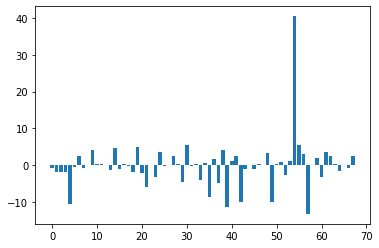

In [32]:
# feature importance
# get importance
importance = lr.coef_[0]
# summarize feature importance
for i, v in enumerate(importance):
    print(f'Feature: {i} {data_train.columns[i]}, Score: {v}')

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [33]:
rfe = RFECV(estimator=LogisticRegression(max_iter=10000),cv=5,scoring='neg_log_loss', min_features_to_select=30, step=5,verbose=2)
rfe.fit(data_train, target_train)
prediction = rfe.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
ll=log_loss(target_test,prediction)
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))
print("The Los_loss on test set: {:.4f}".format(ll))

Fitting estimator with 68 features.
Fitting estimator with 63 features.
Fitting estimator with 58 features.
Fitting estimator with 53 features.
Fitting estimator with 48 features.
Fitting estimator with 43 features.
Fitting estimator with 38 features.
Fitting estimator with 33 features.
Fitting estimator with 68 features.
Fitting estimator with 63 features.
Fitting estimator with 58 features.
Fitting estimator with 53 features.
Fitting estimator with 48 features.
Fitting estimator with 43 features.
Fitting estimator with 38 features.
Fitting estimator with 33 features.
Fitting estimator with 68 features.
Fitting estimator with 63 features.
Fitting estimator with 58 features.
Fitting estimator with 53 features.
Fitting estimator with 48 features.
Fitting estimator with 43 features.
Fitting estimator with 38 features.
Fitting estimator with 33 features.
Fitting estimator with 68 features.
Fitting estimator with 63 features.
Fitting estimator with 58 features.
Fitting estimator with 53 fe

In [34]:
# summarize all features
dropped_features = set()

for i in range(len(data_train.columns)):
    print('Column: %s, Selected %s, Rank: %.3f' % (data_train.columns[i], rfe.support_[i], rfe.ranking_[i]))
    if rfe.ranking_[i]>1.000:
        colname = data_train.columns[i]
        dropped_features.add(colname)

print(f"Drop the following features: {dropped_features}")
df_train=df_train.drop(columns=dropped_features)
df_train

Column: number_punctuations_total_difference, Selected True, Rank: 1.000
Column: number_punctuations_total_difference_relative, Selected True, Rank: 1.000
Column: number_punctuations_total_difference_normalized, Selected True, Rank: 1.000
Column: number_words_difference, Selected True, Rank: 1.000
Column: number_words_difference_relative, Selected True, Rank: 1.000
Column: number_!_difference, Selected True, Rank: 1.000
Column: number_!_difference_relative, Selected True, Rank: 1.000
Column: number_!_difference_normalized, Selected True, Rank: 1.000
Column: number_%_difference, Selected False, Rank: 4.000
Column: number_%_difference_relative, Selected True, Rank: 1.000
Column: number_&_difference, Selected False, Rank: 2.000
Column: number_&_difference_relative, Selected False, Rank: 2.000
Column: number_'_difference, Selected False, Rank: 4.000
Column: number_(_difference, Selected True, Rank: 1.000
Column: number_(_difference_relative, Selected True, Rank: 1.000
Column: number_(_diff

,number_punctuations_total_difference,number_punctuations_total_difference_relative,number_punctuations_total_difference_normalized,number_words_difference,number_words_difference_relative,number_!_difference,number_!_difference_relative,number_!_difference_normalized,number_%_difference_relative,number_(_difference,...,pca_embeddding_average_diff_1,pca_embeddding_average_diff_2,pca_embeddding_tf_idf_diff_2,pca_embeddding_average_diff_3,pca_embeddding_average_diff_4,pca_embeddding_average_diff_5,pca_embeddding_average_diff_6,pca_embeddding_average_diff_8,pca_embeddding_average_diff_9,Translation
0,0.661017,0.116667,0.289525,0.488506,0.015504,0.333333,0.5,0.333333,0.25,0.5,...,0.521752,0.574370,0.518234,0.537569,0.534955,0.543298,0.443394,0.567010,0.475334,1.0
1,0.491525,0.033333,0.400000,0.517241,0.017544,0.333333,0.5,0.333333,0.25,0.5,...,0.288790,0.500732,0.502476,0.413645,0.388961,0.557938,0.386897,0.539811,0.431191,1.0
2,0.542373,0.033333,0.250000,0.528736,0.022556,0.333333,0.5,0.333333,0.25,0.5,...,0.420045,0.515422,0.501320,0.476876,0.300935,0.761166,0.339494,0.525116,0.574548,1.0
3,0.491525,0.033333,0.416842,0.540230,0.022942,0.333333,0.5,0.333333,0.25,0.5,...,0.441940,0.558488,0.517626,0.463485,0.386767,0.474701,0.323096,0.586224,0.424620,1.0
4,0.491525,0.033333,0.392437,0.500000,0.014254,0.333333,0.5,0.333333,0.25,0.5,...,0.445187,0.530619,0.511101,0.507666,0.470015,0.532894,0.322316,0.625201,0.427493,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219995,0.542373,0.133333,0.334545,0.551724,0.028070,0.333333,0.5,0.333333,0.25,0.5,...,0.505158,0.479390,0.508223,0.551199,0.495638,0.518470,0.462412,0.577387,0.459207,0.0
219996,0.508475,0.066667,0.345455,0.511494,0.015789,0.333333,0.5,0.333333,0.25,0.5,...,0.476166,0.546224,0.513374,0.459046,0.419694,0.397374,0.505843,0.618739,0.458924,0.0
219997,0.491525,0.033333,0.411688,0.534483,0.022807,0.333333,0.5,0.333333,0.25,0.5,...,0.510340,0.575219,0.533707,0.461098,0.485584,0.467400,0.529203,0.643697,0.489480,0.0
219998,0.508475,0.066667,0.379545,0.540230,0.024561,0.333333,0.5,0.333333,0.25,0.5,...,0.480865,0.590120,0.531129,0.496286,0.427378,0.478172,0.490476,0.675508,0.464431,0.0


In [ ]:
# Drop the following features: {'number_&_difference', 'number_[_difference', 'score_polarity_difference_relative', 'number_;_difference', 'number_stopwords_difference_normalized', 'number_/_difference', 'number_?_difference_normalized', "number_'_difference", 'score_subjectivity_difference', 'number_%_difference', 'pca_embeddding_average_diff_7', 'number_+_difference', 'score_subjectivity_difference_relative', 'number_&_difference_relative', 'number_,_difference_normalized'}

## Dropped features with logistic regression -> 53 Features

In [35]:
target_train=df_train['Translation']
data_train=df_train.drop(columns=['Translation'])

In [36]:
data_train, data_test, target_train, target_test = train_test_split(data_train, target_train, test_size=0.2, random_state=42, stratify=target_train)

## Naive Bayes

In [37]:
nb = GaussianNB().fit(data_train, target_train)
prediction = nb.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
ll=log_loss(target_test,prediction)
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))
print("The Los_loss on test set: {:.4f}".format(ll))

The Accuracy on test set: 0.7704
The F1-Score on test set: 0.4329
The Precision-Score on test set: 0.2795
The Recall-Score on test set: 0.9594
The Los_loss on test set: 7.9315


## Multi-Layer-Perceptron

In [38]:
mlp = MLPClassifier().fit(data_train, target_train)
prediction = mlp.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
ll=log_loss(target_test,prediction)
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))
print("The Los_loss on test set: {:.4f}".format(ll))

The Accuracy on test set: 0.9871
The F1-Score on test set: 0.9281
The Precision-Score on test set: 0.9460
The Recall-Score on test set: 0.9109
The Los_loss on test set: 0.4451


## Logistic Regression

In [39]:
lr = LogisticRegression(max_iter=10000).fit(data_train, target_train)
prediction = lr.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
ll=log_loss(target_test,prediction)
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))
print("The Los_loss on test set: {:.4f}".format(ll))

The Accuracy on test set: 0.9802
The F1-Score on test set: 0.8840
The Precision-Score on test set: 0.9497
The Recall-Score on test set: 0.8268
The Los_loss on test set: 0.6845


Feature: 0 number_punctuations_total_difference, Score: -0.7951649038499251
Feature: 1 number_punctuations_total_difference_relative, Score: -1.8293419036832799
Feature: 2 number_punctuations_total_difference_normalized, Score: -1.9284374943934466
Feature: 3 number_words_difference, Score: -1.871117744403811
Feature: 4 number_words_difference_relative, Score: -10.529913058119725
Feature: 5 number_!_difference, Score: -0.5542152178424924
Feature: 6 number_!_difference_relative, Score: 2.471939575201305
Feature: 7 number_!_difference_normalized, Score: -0.709696392695742
Feature: 8 number_%_difference_relative, Score: 4.04406100725309
Feature: 9 number_(_difference, Score: -1.3870828912625006
Feature: 10 number_(_difference_relative, Score: 4.741344514383516
Feature: 11 number_(_difference_normalized, Score: -0.9916196419477058
Feature: 12 number_-_difference, Score: -2.0597094280233765
Feature: 13 number_-_difference_relative, Score: 5.017281805030127
Feature: 14 number_._difference, Sc

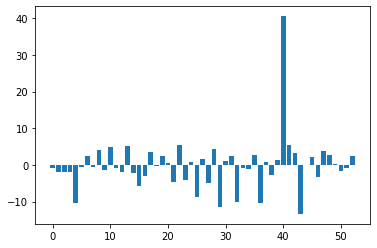

In [40]:
# feature importance
# get importance
importance = lr.coef_[0]
# summarize feature importance
for i, v in enumerate(importance):
    print(f'Feature: {i} {data_train.columns[i]}, Score: {v}')

# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [48]:
rfe = RFECV(estimator=LogisticRegression(max_iter=10000),cv=5,scoring='neg_log_loss', min_features_to_select=10, step=2,verbose=2)
rfe.fit(data_train, target_train)
prediction = rfe.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
ll=log_loss(target_test,prediction)
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))
print("The Los_loss on test set: {:.4f}".format(ll))

Fitting estimator with 50 features.
Fitting estimator with 48 features.
Fitting estimator with 46 features.
Fitting estimator with 44 features.
Fitting estimator with 42 features.
Fitting estimator with 40 features.
Fitting estimator with 38 features.
Fitting estimator with 36 features.
Fitting estimator with 34 features.
Fitting estimator with 32 features.
Fitting estimator with 30 features.
Fitting estimator with 28 features.
Fitting estimator with 26 features.
Fitting estimator with 24 features.
Fitting estimator with 22 features.
Fitting estimator with 20 features.
Fitting estimator with 18 features.
Fitting estimator with 16 features.
Fitting estimator with 14 features.
Fitting estimator with 12 features.
Fitting estimator with 50 features.
Fitting estimator with 48 features.
Fitting estimator with 46 features.
Fitting estimator with 44 features.
Fitting estimator with 42 features.
Fitting estimator with 40 features.
Fitting estimator with 38 features.
Fitting estimator with 36 fe

In [49]:
# summarize all features
dropped_features = set()

for i in range(len(data_train.columns)):
    print('Column: %s, Selected %s, Rank: %.3f' % (data_train.columns[i], rfe.support_[i], rfe.ranking_[i]))
    if rfe.ranking_[i]>1.000:
        colname = data_train.columns[i]
        dropped_features.add(colname)

print(f"Drop the following features: {dropped_features}")
df_train=df_train.drop(columns=dropped_features)
df_train

Column: number_punctuations_total_difference, Selected True, Rank: 1.000
Column: number_punctuations_total_difference_relative, Selected True, Rank: 1.000
Column: number_punctuations_total_difference_normalized, Selected True, Rank: 1.000
Column: number_words_difference, Selected True, Rank: 1.000
Column: number_words_difference_relative, Selected True, Rank: 1.000
Column: number_!_difference, Selected True, Rank: 1.000
Column: number_!_difference_relative, Selected True, Rank: 1.000
Column: number_!_difference_normalized, Selected True, Rank: 1.000
Column: number_%_difference_relative, Selected True, Rank: 1.000
Column: number_(_difference, Selected True, Rank: 1.000
Column: number_(_difference_relative, Selected True, Rank: 1.000
Column: number_(_difference_normalized, Selected True, Rank: 1.000
Column: number_-_difference, Selected True, Rank: 1.000
Column: number_-_difference_relative, Selected True, Rank: 1.000
Column: number_._difference, Selected True, Rank: 1.000
Column: number

,number_punctuations_total_difference,number_punctuations_total_difference_relative,number_punctuations_total_difference_normalized,number_words_difference,number_words_difference_relative,number_!_difference,number_!_difference_relative,number_!_difference_normalized,number_%_difference_relative,number_(_difference,...,pca_embeddding_average_diff_0,pca_embeddding_tf_idf_diff_0,pca_embeddding_average_diff_2,pca_embeddding_tf_idf_diff_2,pca_embeddding_average_diff_3,pca_embeddding_average_diff_4,pca_embeddding_average_diff_6,pca_embeddding_average_diff_8,pca_embeddding_average_diff_9,Translation
0,0.661017,0.116667,0.289525,0.488506,0.015504,0.333333,0.5,0.333333,0.25,0.5,...,0.441402,0.665074,0.574370,0.518234,0.537569,0.534955,0.443394,0.567010,0.475334,1.0
1,0.491525,0.033333,0.400000,0.517241,0.017544,0.333333,0.5,0.333333,0.25,0.5,...,0.669756,0.699150,0.500732,0.502476,0.413645,0.388961,0.386897,0.539811,0.431191,1.0
2,0.542373,0.033333,0.250000,0.528736,0.022556,0.333333,0.5,0.333333,0.25,0.5,...,0.543513,0.650832,0.515422,0.501320,0.476876,0.300935,0.339494,0.525116,0.574548,1.0
3,0.491525,0.033333,0.416842,0.540230,0.022942,0.333333,0.5,0.333333,0.25,0.5,...,0.428283,0.635209,0.558488,0.517626,0.463485,0.386767,0.323096,0.586224,0.424620,1.0
4,0.491525,0.033333,0.392437,0.500000,0.014254,0.333333,0.5,0.333333,0.25,0.5,...,0.349213,0.611778,0.530619,0.511101,0.507666,0.470015,0.322316,0.625201,0.427493,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219995,0.542373,0.133333,0.334545,0.551724,0.028070,0.333333,0.5,0.333333,0.25,0.5,...,0.540935,0.651554,0.479390,0.508223,0.551199,0.495638,0.462412,0.577387,0.459207,0.0
219996,0.508475,0.066667,0.345455,0.511494,0.015789,0.333333,0.5,0.333333,0.25,0.5,...,0.454897,0.621463,0.546224,0.513374,0.459046,0.419694,0.505843,0.618739,0.458924,0.0
219997,0.491525,0.033333,0.411688,0.534483,0.022807,0.333333,0.5,0.333333,0.25,0.5,...,0.504984,0.648818,0.575219,0.533707,0.461098,0.485584,0.529203,0.643697,0.489480,0.0
219998,0.508475,0.066667,0.379545,0.540230,0.024561,0.333333,0.5,0.333333,0.25,0.5,...,0.469559,0.630769,0.590120,0.531129,0.496286,0.427378,0.490476,0.675508,0.464431,0.0


## Dropped features with logistic regression -> 50 Features

In [50]:
target_train=df_train['Translation']
data_train=df_train.drop(columns=['Translation'])

In [51]:
data_train, data_test, target_train, target_test = train_test_split(data_train, target_train, test_size=0.2, random_state=42, stratify=target_train)

## Naive Bayes

In [52]:
nb = GaussianNB().fit(data_train, target_train)
prediction = nb.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
ll=log_loss(target_test,prediction)
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))
print("The Los_loss on test set: {:.4f}".format(ll))

The Accuracy on test set: 0.7729
The F1-Score on test set: 0.4363
The Precision-Score on test set: 0.2821
The Recall-Score on test set: 0.9622
The Los_loss on test set: 7.8444


## Multi-Layer-Perceptron

In [53]:
mlp = MLPClassifier().fit(data_train, target_train)
prediction = mlp.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
ll=log_loss(target_test,prediction)
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))
print("The Los_loss on test set: {:.4f}".format(ll))

The Accuracy on test set: 0.9875
The F1-Score on test set: 0.9303
The Precision-Score on test set: 0.9467
The Recall-Score on test set: 0.9144
The Los_loss on test set: 0.4325


## Logistic Regression

In [47]:
lr = LogisticRegression(max_iter=10000).fit(data_train, target_train)
prediction = lr.predict(data_test)
acc = accuracy_score(target_test,prediction) 
f1= f1_score(target_test,prediction) 
pr= precision_score(target_test,prediction) 
re= recall_score(target_test,prediction) 
ll=log_loss(target_test,prediction)
print("The Accuracy on test set: {:.4f}".format(acc))
print("The F1-Score on test set: {:.4f}".format(f1))
print("The Precision-Score on test set: {:.4f}".format(pr))
print("The Recall-Score on test set: {:.4f}".format(re))
print("The Los_loss on test set: {:.4f}".format(ll))

The Accuracy on test set: 0.9800
The F1-Score on test set: 0.8832
The Precision-Score on test set: 0.9494
The Recall-Score on test set: 0.8256
The Los_loss on test set: 0.6892


In [56]:
data_train.columns

Index(['number_punctuations_total_difference',
       'number_punctuations_total_difference_relative',
       'number_punctuations_total_difference_normalized',
       'number_words_difference', 'number_words_difference_relative',
       'number_!_difference', 'number_!_difference_relative',
       'number_!_difference_normalized', 'number_%_difference_relative',
       'number_(_difference', 'number_(_difference_relative',
       'number_(_difference_normalized', 'number_-_difference',
       'number_-_difference_relative', 'number_._difference',
       'number_._difference_normalized', 'number_:_difference',
       'number_:_difference_relative', 'number_;_difference_relative',
       'number_;_difference_normalized', 'number_?_difference',
       'number_?_difference_relative',
       'number_characters_difference_normalized', 'characters_avg_difference',
       'characters_avg_difference_normalized', 'number_ADJ_difference',
       'number_ADJ_difference_relative', 'number_ADJ_diff

In [ ]:
#subset columns
# Index(['number_punctuations_total_difference',
#        'number_punctuations_total_difference_relative',
#        'number_punctuations_total_difference_normalized',
#        'number_words_difference', 'number_words_difference_relative',
#        'number_!_difference', 'number_!_difference_relative',
#        'number_!_difference_normalized', 'number_%_difference_relative',
#        'number_(_difference', 'number_(_difference_relative',
#        'number_(_difference_normalized', 'number_-_difference',
#        'number_-_difference_relative', 'number_._difference',
#        'number_._difference_normalized', 'number_:_difference',
#        'number_:_difference_relative', 'number_;_difference_relative',
#        'number_;_difference_normalized', 'number_?_difference',
#        'number_?_difference_relative',
#        'number_characters_difference_normalized', 'characters_avg_difference',
#        'characters_avg_difference_normalized', 'number_ADJ_difference',
#        'number_ADJ_difference_relative', 'number_ADJ_difference_normalized',
#        'number_NOUN_difference_relative', 'number_NOUN_difference_normalized',
#        'number_VERB_difference', 'number_VERB_difference_relative',
#        'score_polarity_difference', 'score_polarity_difference_normalized',
#        'score_subjectivity_difference_normalized',
#        'number_stopwords_difference_relative', 'word_mover_distance',
#        'cosine_similarity_average', 'euclidean_distance_average',
#        'jaccard_translation_source', 'jaccard_numbers_source',
#        'pca_embeddding_average_diff_0', 'pca_embeddding_tf_idf_diff_0',
#        'pca_embeddding_average_diff_2', 'pca_embeddding_tf_idf_diff_2',
#        'pca_embeddding_average_diff_3', 'pca_embeddding_average_diff_4',
#        'pca_embeddding_average_diff_6', 'pca_embeddding_average_diff_8',
#        'pca_embeddding_average_diff_9'],
#       dtype='object')